Auteur : Audrey Hohmann

# Projet P4 : Anticipez les besoins en consommation de bâtiments
## Notebook: prédire les émissions de CO2 de bâtiments non destinés à l’habitation

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl

from sklearn import linear_model
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
pd.options.mode.chained_assignment = None 

In [4]:
df = pd.read_csv('data_P4_clean.csv') 

In [5]:
df.head()

,OSEBuildingID,proportionparking,Proportionbat,old_built,PropertyGFATotal,NumberofBuildings,NumberofFloors,mean_GFA_per_floor,prop_gfa_largest_property,diff_prop_gfa_largest_property_per_type,SteamUse(kBtu)_pct,Electricity(kBtu)_pct,NaturalGas(kBtu)_pct,Longitude,Latitude,SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity,ENERGYSTARScore,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_infrequent_sklearn,PrimaryPropertyType_Large Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,PrimaryPropertyType_infrequent_sklearn,Neighborhood_lcaps_downtown,Neighborhood_lcaps_east,Neighborhood_lcaps_greater duwamish,Neighborhood_lcaps_lake union,Neighborhood_lcaps_magnolia / queen anne,Neighborhood_lcaps_northeast,Neighborhood_lcaps_northwest,Neighborhood_lcaps_infrequent_sklearn,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Worship Facility,LargestPropertyUseType_infrequent_sklearn,BuildingType,PrimaryPropertyType,Neighborhood_lcaps,LargestPropertyUseType,BuildingType_cat,PrimaryPropertyType_cat,Neighborhood_lcaps_cat,LargestPropertyUseType_cat
0,1,0.000000,1.000000,89,88434,1.0,12,6802.615385,1.000000,0.114542,0.277302,0.546060,0.176638,-122.33799,47.61220,7456910.0,84.300003,249.98,2.83,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NonResidential,Hotel,downtown,Hotel,0,2,3,10
1,2,0.145453,0.854547,20,103566,1.0,11,7375.166667,0.809918,-0.075540,0.000000,0.386609,0.613391,-122.33393,47.61317,8664479.0,97.900002,295.86,2.86,61.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NonResidential,Hotel,downtown,Hotel,0,2,3,10
2,5,0.000000,1.000000,90,61320,1.0,10,5574.545455,1.000000,0.114542,0.325913,0.407519,0.266567,-122.33664,47.61412,6946800.5,113.300003,286.43,4.67,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NonResidential,Hotel,downtown,Hotel,0,2,3,10
3,9,0.382349,0.617651,17,97288,1.0,2,20030.000000,0.913062,0.000000,0.000000,0.609884,0.390116,-122.33657,47.61623,12581712.0,141.600006,301.81,3.10,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Nonresidential COS,Other,downtown,Police Station,1,8,3,36
4,10,0.000000,1.000000,90,83008,1.0,11,6917.333333,0.980050,0.094592,0.000000,0.488160,0.511840,-122.33283,47.61390,6062767.5,74.500000,176.14,2.12,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NonResidential,Hotel,downtown,Hotel,0,2,3,10


In [6]:
df.isna().sum()

OSEBuildingID                                          0
proportionparking                                      0
Proportionbat                                          0
old_built                                              0
PropertyGFATotal                                       0
NumberofBuildings                                      0
NumberofFloors                                         0
mean_GFA_per_floor                                     0
prop_gfa_largest_property                              0
diff_prop_gfa_largest_property_per_type                0
SteamUse(kBtu)_pct                                     0
Electricity(kBtu)_pct                                  0
NaturalGas(kBtu)_pct                                   0
Longitude                                              0
Latitude                                               0
SiteEnergyUseWN(kBtu)                                  0
SiteEUIWN(kBtu/sf)                                     0
TotalGHGEmissions              

In [7]:
ls_mod=['proportionparking','Proportionbat', 'old_built', 'PropertyGFATotal','NumberofBuildings',
        'NumberofFloors', 
        'mean_GFA_per_floor', 'prop_gfa_largest_property', 
        'diff_prop_gfa_largest_property_per_type', 'SteamUse(kBtu)_pct', 'Electricity(kBtu)_pct', 
        'NaturalGas(kBtu)_pct', 
        'Longitude', 'Latitude']

In [8]:
target = 'TotalGHGEmissions'

# avec feature OHE

In [9]:
# avec feature OHE
cols_ohe = ls_mod + list(df.loc[:,(df.columns.str.startswith(('BuildingType_', 'PrimaryPropertyType_', 'Neighborhood_lcaps_', 'LargestPropertyUseType_')) & (~df.columns.str.endswith(('_cat'))))])

In [10]:
cols_ohe

['proportionparking',
 'Proportionbat',
 'old_built',
 'PropertyGFATotal',
 'NumberofBuildings',
 'NumberofFloors',
 'mean_GFA_per_floor',
 'prop_gfa_largest_property',
 'diff_prop_gfa_largest_property_per_type',
 'SteamUse(kBtu)_pct',
 'Electricity(kBtu)_pct',
 'NaturalGas(kBtu)_pct',
 'Longitude',
 'Latitude',
 'BuildingType_NonResidential',
 'BuildingType_Nonresidential COS',
 'BuildingType_infrequent_sklearn',
 'PrimaryPropertyType_Large Office',
 'PrimaryPropertyType_Mixed Use Property',
 'PrimaryPropertyType_Other',
 'PrimaryPropertyType_Retail Store',
 'PrimaryPropertyType_Small- and Mid-Sized Office',
 'PrimaryPropertyType_Warehouse',
 'PrimaryPropertyType_Worship Facility',
 'PrimaryPropertyType_infrequent_sklearn',
 'Neighborhood_lcaps_downtown',
 'Neighborhood_lcaps_east',
 'Neighborhood_lcaps_greater duwamish',
 'Neighborhood_lcaps_lake union',
 'Neighborhood_lcaps_magnolia / queen anne',
 'Neighborhood_lcaps_northeast',
 'Neighborhood_lcaps_northwest',
 'Neighborhood_lcaps

In [11]:
df_ml = df[cols_ohe + [target]]

In [12]:
df_ml.shape

(1245, 40)

In [13]:
X = df_ml[cols_ohe]
y = df_ml[target]

In [14]:
y.head()

0    249.98
1    295.86
2    286.43
3    301.81
4    176.14
Name: TotalGHGEmissions, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme {y_train.shape} ")
print(f"Nous avons X_test de forme {X_test.shape} et y_test de forme {y_test.shape} ")

Nous avons X_train de forme (933, 39) et y_train de forme (933,) 
Nous avons X_test de forme (312, 39) et y_test de forme (312,) 


In [17]:
scaler = StandardScaler()
std_scaler = scaler.fit(X) 
X_std = std_scaler.transform(X)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# avec LabelEncoder

In [18]:
# avec feature LE
cols_le = ls_mod + list(df.loc[:, df.columns.str.endswith(('_cat'))])

In [19]:
cols_le

['proportionparking',
 'Proportionbat',
 'old_built',
 'PropertyGFATotal',
 'NumberofBuildings',
 'NumberofFloors',
 'mean_GFA_per_floor',
 'prop_gfa_largest_property',
 'diff_prop_gfa_largest_property_per_type',
 'SteamUse(kBtu)_pct',
 'Electricity(kBtu)_pct',
 'NaturalGas(kBtu)_pct',
 'Longitude',
 'Latitude',
 'BuildingType_cat',
 'PrimaryPropertyType_cat',
 'Neighborhood_lcaps_cat',
 'LargestPropertyUseType_cat']

In [20]:
X_le = df[cols_le]
y_le = df[target]

In [21]:
scaler = StandardScaler()
X_le_std = scaler.fit_transform(X_le)

In [22]:
X_train_std_le, X_test_std_le, y_train_le, y_test_le = train_test_split(X_le_std, y_le, test_size=0.25, random_state=42)

In [23]:
#transformation en df
X_train_std_le_df = pd.DataFrame(X_train_std_le, columns = X_le.columns)
X_test_std_le_df = pd.DataFrame(X_test_std_le, columns = X_le.columns)

# Déclaration des modèles linéaires testés

In [24]:
# baseline moyenne du jeu d'entraînement
dummyR = DummyRegressor(strategy="mean")

In [25]:
reglasso = linear_model.Lasso(tol=0.01, random_state=42)

In [26]:
regridge = linear_model.Ridge(random_state=42) 

In [27]:
regrEN = linear_model.ElasticNet(random_state=42)

In [28]:
dtreereg = DecisionTreeRegressor(max_depth=20, min_samples_leaf=20, random_state=42)

# Sans validation croisée

## Création de la baseline 

In [29]:
dummyR.fit(X_train_std, y_train)

DummyRegressor()

In [30]:
y_pred_dummy_mean = dummyR.predict(X_test_std)

In [31]:
y_pred_dummy_mean.mean()

61.1662486602358

In [32]:
y_pred_dummy_mean.std()

0.0

In [33]:
def score(estimator, X_train, y_train, X_test, y_test): 
    """ compute and print train score and test score """
    """ Return the coefficient of determination R^2 of the prediction."""
    tr_score = estimator.score(X_train, y_train)
    te_score = estimator.score(X_test, y_test)
    
    print(f"score train : {tr_score} and score test : {te_score} " )

In [34]:
score(dummyR, X_train_std, y_train, X_test_std, y_test)

score train : 0.0 and score test : -0.0021803381443328274 


## Modèles de prédiction linéaire

### Lasso

In [35]:
reglasso.fit(X_train_std, y_train)

Lasso(random_state=42, tol=0.01)

In [36]:
y_pred_reglasso = reglasso.predict(X_test_std)

In [37]:
score(reglasso, X_train_std, y_train, X_test_std, y_test)

score train : 0.4696930970136791 and score test : 0.4488875566897689 


### Regression Ridge

In [38]:
regridge.fit(X_train_std, y_train)

Ridge(random_state=42)

In [39]:
y_pred_regridge = regridge.predict(X_test_std)

In [40]:
score(regridge, X_train_std, y_train, X_test_std, y_test)

score train : 0.48485514962587073 and score test : 0.4460929274145541 


### Elastic net

In [41]:
regrEN.fit(X_train_std, y_train)

ElasticNet(random_state=42)

In [42]:
y_pred_regrEN = regrEN.predict(X_test_std)

In [43]:
score(regrEN, X_train_std, y_train, X_test_std, y_test)

score train : 0.4355562655485792 and score test : 0.41965004802229533 


### Decision Tree Regressor

In [44]:
dtreereg.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=20, random_state=42)

In [45]:
y_pred_DT = dtreereg.predict(X_test_std)

In [46]:
score(dtreereg, X_train_std, y_train, X_test_std, y_test)

score train : 0.5801556341442526 and score test : 0.41474914258770457 


In [47]:
print("Affichage des scores test pour l'ensemble des modèles linéaires testés:")
print()
print("Mean absolute error (dummy): {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_dummy_mean)))
print("Mean absolute error (Elastic Net): {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_regrEN)))
print("Mean absolute error (Ridge regression): {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_regridge)))
print("Mean absolute error (Lasso): {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_reglasso)))
print("Mean absolute error (Decision Tree Regressor): {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_DT)))
print()
print("Root mean squared error (dummy): {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_dummy_mean, squared=False)))                                                                     
print("Root mean squared error (Elastic Net): {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_regrEN, squared=False)))                                                                   
print("Root mean squared error (Ridge Regression): {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_regridge, squared=False)))
print("Root mean squared error (Lasso): {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_reglasso, squared=False)))
print("Root mean squared error (Decision Tree Regressor): {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_DT, squared=False)))
print()
print("r2_score (dummy mean): {:.2f}".format(metrics.r2_score(y_test, y_pred_dummy_mean)))
print("r2_score (Elastic Net): {:.2f}".format(metrics.r2_score(y_test, y_pred_regrEN)))
print("r2_score (Ridge Regression {:.2f}".format(metrics.r2_score(y_test, y_pred_regridge)))
print("r2_score (Lasso) {:.2f}".format(metrics.r2_score(y_test, y_pred_reglasso)))
print("r2_score (Decision Tree Regressor) {:.2f}".format(metrics.r2_score(y_test, y_pred_DT)))

Affichage des scores test pour l'ensemble des modèles linéaires testés:

Mean absolute error (dummy): 48.28
Mean absolute error (Elastic Net): 35.07
Mean absolute error (Ridge regression): 34.52
Mean absolute error (Lasso): 34.28
Mean absolute error (Decision Tree Regressor): 33.31

Root mean squared error (dummy): 66.92
Root mean squared error (Elastic Net): 50.92
Root mean squared error (Ridge Regression): 49.75
Root mean squared error (Lasso): 49.62
Root mean squared error (Decision Tree Regressor): 51.14

r2_score (dummy mean): -0.00
r2_score (Elastic Net): 0.42
r2_score (Ridge Regression 0.45
r2_score (Lasso) 0.45
r2_score (Decision Tree Regressor) 0.41


# Modèles linéaires avec validation croisée

rmse_scorer = metrics.make_scorer(metrics.mean_squared_error, squared=False)

In [125]:
def scores (estimator, name_scoring, ncv, X, y) : 
    scores_estimator = cross_validate(estimator, X, y, scoring=name_scoring, cv=ncv)
    for score in name_scoring:
        scores = scores_estimator['test_' + score].mean().round(4)
        std = scores_estimator['test_' + score].std().round(4)
    
        print(f"Avec le modèle linéaire en validation croisée : {estimator}, le {score} moyen est de {scores}, avec un écart-type de {std}") 

In [126]:
scores(dummyR, ['neg_root_mean_squared_error', 'r2'] , 10, X_train_std, y_train)

Avec le modèle linéaire en validation croisée : DummyRegressor(), le neg_root_mean_squared_error moyen est de -64.8212, avec un écart-type de 8.1083
Avec le modèle linéaire en validation croisée : DummyRegressor(), le r2 moyen est de -0.0138, avec un écart-type de 0.0205


In [127]:
scores(dtreereg, ['neg_root_mean_squared_error', 'r2'], 10, X_train_std, y_train)

Avec le modèle linéaire en validation croisée : DecisionTreeRegressor(max_depth=20, min_samples_leaf=20, random_state=42), le neg_root_mean_squared_error moyen est de -52.4396, avec un écart-type de 6.0109
Avec le modèle linéaire en validation croisée : DecisionTreeRegressor(max_depth=20, min_samples_leaf=20, random_state=42), le r2 moyen est de 0.3232, avec un écart-type de 0.1292


In [128]:
scores(regrEN, ['neg_root_mean_squared_error', 'r2'], 10, X_train_std, y_train)

Avec le modèle linéaire en validation croisée : ElasticNet(random_state=42), le neg_root_mean_squared_error moyen est de -49.9396, avec un écart-type de 6.3634
Avec le modèle linéaire en validation croisée : ElasticNet(random_state=42), le r2 moyen est de 0.3957, avec un écart-type de 0.0615


In [129]:
scores(regridge, ['neg_root_mean_squared_error', 'r2'], 10, X_train_std, y_train)

Avec le modèle linéaire en validation croisée : Ridge(random_state=42), le neg_root_mean_squared_error moyen est de -48.8047, avec un écart-type de 5.5572
Avec le modèle linéaire en validation croisée : Ridge(random_state=42), le r2 moyen est de 0.4147, avec un écart-type de 0.116


In [130]:
scores(reglasso, ['neg_root_mean_squared_error', 'r2'], 10, X_train_std, y_train)

Avec le modèle linéaire en validation croisée : Lasso(random_state=42, tol=0.01), le neg_root_mean_squared_error moyen est de -48.8392, avec un écart-type de 5.8743
Avec le modèle linéaire en validation croisée : Lasso(random_state=42, tol=0.01), le r2 moyen est de 0.4177, avec un écart-type de 0.0915


# Modèles ensemblistes avec validation croisée


In [122]:
rf_clf = RandomForestRegressor(n_estimators=100, max_features=0.8, 
                            max_depth=15, random_state=42, n_jobs=-1)

In [123]:
scores(rf_clf, ['neg_root_mean_squared_error', 'r2'], 10, X_train_std_le, y_train_le)

Avec le modèle linéaire en validation croisée : RandomForestRegressor(max_depth=15, max_features=0.8, n_jobs=-1,
                      random_state=42), le neg_root_mean_squared_error moyen est de -44.7891, avec un écart-type de 4.7607
Avec le modèle linéaire en validation croisée : RandomForestRegressor(max_depth=15, max_features=0.8, n_jobs=-1,
                      random_state=42), le r2 moyen est de 0.5099, avec un écart-type de 0.0634


In [132]:
gb_clf = GradientBoostingRegressor(n_estimators=100, 
               learning_rate=0.1, max_depth=20, max_features=0.8, random_state=42)

In [133]:
scores(gb_clf, ['neg_root_mean_squared_error', 'r2'], 10, X_train_std, y_train)

Avec le modèle linéaire en validation croisée : GradientBoostingRegressor(max_depth=20, max_features=0.8, random_state=42), le neg_root_mean_squared_error moyen est de -54.1102, avec un écart-type de 5.5504
Avec le modèle linéaire en validation croisée : GradientBoostingRegressor(max_depth=20, max_features=0.8, random_state=42), le r2 moyen est de 0.2667, avec un écart-type de 0.197


# Modèles linéaires avec recherche des hyperparamètres optimaux

In [58]:
def GSCVscores(estimator, parameters, X, y, ncv=10, scoring=None, transform_target=False, random_state=42):
    
    parameters_used = parameters.copy()
    
    if transform_target:
        for key in parameters.keys():
            parameters_used[f'regressor__{key}'] = parameters_used[key]
            parameters_used.pop(key)
    
    if scoring is None:
        scoring = ['r2','neg_root_mean_squared_error','neg_mean_absolute_error']
        
    clf = GridSearchCV(estimator, param_grid=parameters_used,n_jobs=-1, scoring=scoring, 
                       cv=ncv, refit='neg_root_mean_squared_error')
    clf.fit(X, y)
    df_gridscv = pd.DataFrame(clf.cv_results_)
    results = {'score': [], 'best_score': [], 'best_params': [], 'fit_time': []}
    for score in scoring:
        df_gridscv_best = df_gridscv[df_gridscv[f'mean_test_{score}'] == df_gridscv[f'mean_test_{score}'].max()]
        results['score'].append(score)
        results['best_score'].append(df_gridscv_best[f'mean_test_{score}'].values[0])
        results['best_params'].append(df_gridscv_best['params'].values[0])
        results['fit_time'].append(df_gridscv_best['mean_fit_time'].values[0])

    return pd.DataFrame(results)

###### Pour test de passage au log de la target : 

In [59]:
from sklearn.compose import TransformedTargetRegressor

In [60]:
def log_target(x):
    return np.log(x + 1)

def inv_log_target(x):
    return np.exp(x) - 1

### Lasso

In [61]:
lasso_parameters = {'alpha': np.array(range(1, 31)) / 10, 'tol': [0.0001, 0.001, 0.01]}

In [62]:
results_lasso = GSCVscores(TransformedTargetRegressor(
                                regressor=linear_model.Lasso(), 
                                func=log_target, 
                                inverse_func=inv_log_target), lasso_parameters,
                   X_train_std, y_train,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10,
                   transform_target=True)

In [63]:
# avec passage au log de la target
results_lasso

,score,best_score,best_params,fit_time
0,r2,0.124104,"{'regressor__alpha': 0.2, 'regressor__tol': 0.0001}",0.002899
1,neg_root_mean_squared_error,-59.864825,"{'regressor__alpha': 0.1, 'regressor__tol': 0.0001}",0.005941
2,neg_mean_absolute_error,-33.569036,"{'regressor__alpha': 0.1, 'regressor__tol': 0.0001}",0.005941


In [64]:
results_lasso = GSCVscores(reglasso, lasso_parameters,
                   X_train_std, y_train,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10)

In [65]:
results_lasso

,score,best_score,best_params,fit_time
0,r2,0.418362,"{'alpha': 1.1, 'tol': 0.0001}",0.030104
1,neg_root_mean_squared_error,-48.771111,"{'alpha': 0.2, 'tol': 0.0001}",0.009345
2,neg_mean_absolute_error,-32.488774,"{'alpha': 2.2, 'tol': 0.01}",0.003450


### Ridge

In [66]:
results_ridge = GSCVscores(regridge,lasso_parameters,
                   X_train_std, y_train,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10)

In [67]:
results_ridge

,score,best_score,best_params,fit_time
0,r2,0.415532,"{'alpha': 3.0, 'tol': 0.0001}",0.001837
1,neg_root_mean_squared_error,-48.787252,"{'alpha': 3.0, 'tol': 0.0001}",0.001837
2,neg_mean_absolute_error,-33.042854,"{'alpha': 3.0, 'tol': 0.0001}",0.001837


### Elastic net

In [68]:
EN_parameters = {'alpha': np.array(range(1, 31)) / 10, 'l1_ratio': np.arange(0.01, 1, 0.1), 'tol': [0.0001, 0.001, 0.01]}

In [69]:
results_EN = GSCVscores(regrEN, EN_parameters,
                   X_train_std, y_train,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10)

In [70]:
results_EN

,score,best_score,best_params,fit_time
0,r2,0.418715,"{'alpha': 0.9, 'l1_ratio': 0.91, 'tol': 0.01}",0.003997
1,neg_root_mean_squared_error,-48.788931,"{'alpha': 0.1, 'l1_ratio': 0.91, 'tol': 0.001}",0.006429
2,neg_mean_absolute_error,-32.663116,"{'alpha': 1.1, 'l1_ratio': 0.91, 'tol': 0.01}",0.003035


In [71]:
results_EN = GSCVscores(TransformedTargetRegressor(
                                regressor=linear_model.ElasticNet(), 
                                func=log_target, 
                                inverse_func=inv_log_target), EN_parameters,
                   X_train_std, y_train,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10,
                   transform_target=True)

In [72]:
# avec passage au log de la target
results_EN

,score,best_score,best_params,fit_time
0,r2,0.245274,"{'regressor__alpha': 0.6, 'regressor__l1_ratio': 0.01, 'regressor__tol': 0.01}",0.005419
1,neg_root_mean_squared_error,-55.246030,"{'regressor__alpha': 0.5, 'regressor__l1_ratio': 0.01, 'regressor__tol': 0.001}",0.004592
2,neg_mean_absolute_error,-31.711813,"{'regressor__alpha': 0.3, 'regressor__l1_ratio': 0.01, 'regressor__tol': 0.0001}",0.005886


### Decision Tree Regressor

In [73]:
DTR_parameters={"criterion": ["squared_error", "absolute_error"], 
                "splitter":["best","random"],
            "max_depth" : [2, 3, 5, 10, 20],
           "min_samples_leaf":[5, 10, 20, 50, 100],
           "max_features":["log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

In [74]:
results_DTR = GSCVscores(dtreereg, DTR_parameters,
                   X_train_std, y_train,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10)

In [75]:
results_DTR

,score,best_score,best_params,fit_time
0,r2,0.351791,"{'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 20, 'splitter': 'random'}",0.003562
1,neg_root_mean_squared_error,-51.392933,"{'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 20, 'splitter': 'random'}",0.003562
2,neg_mean_absolute_error,-31.677927,"{'criterion': 'absolute_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'splitter': 'best'}",0.142735


In [76]:
results_DTR = GSCVscores(TransformedTargetRegressor(
                                regressor=DecisionTreeRegressor(), 
                                func=log_target, 
                                inverse_func=inv_log_target), DTR_parameters,
                   X_train_std, y_train,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10,
                   transform_target=True)

In [77]:
# Passage au log de la target
results_DTR

,score,best_score,best_params,fit_time
0,r2,0.375330,"{'regressor__criterion': 'squared_error', 'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__max_leaf_nodes': 60, 'regressor__min_samples_leaf': 10, 'regressor__splitter': 'best'}",0.012278
1,neg_root_mean_squared_error,-50.330261,"{'regressor__criterion': 'squared_error', 'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__max_leaf_nodes': 60, 'regressor__min_samples_leaf': 10, 'regressor__splitter': 'best'}",0.012278
2,neg_mean_absolute_error,-30.773751,"{'regressor__criterion': 'squared_error', 'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__max_leaf_nodes': None, 'regressor__min_samples_leaf': 20, 'regressor__splitter': 'best'}",0.010504


# Modèles ensemblistes avec recherche des hyperparamètres optimaux

### Gradient boosting regressor

In [135]:
GBR_parameters={"loss": ["squared_error", "absolute_error"], "n_estimators" : [50, 100, 200],
                                            "learning_rate" : [0.001, 0.01, 0.1, 0.2], 
                                           "max_depth" : [10, 20], "max_features":["sqrt",None]}

In [136]:
results_GBR =  GSCVscores(GradientBoostingRegressor(), GBR_parameters,
                    X_train_std_le, y_train_le,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10)

In [137]:
results_GBR

,score,best_score,best_params,fit_time
0,r2,0.533398,"{'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}",8.056561
1,neg_root_mean_squared_error,-43.729945,"{'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}",8.056561
2,neg_mean_absolute_error,-27.590190,"{'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 10, 'max_features': None, 'n_estimators': 50}",2.629902


### Random Forest regressor (best model)

In [78]:
RF_parameters={"n_estimators" : [30, 50, 100, 200],
                "criterion": ["squared_error", "absolute_error"], 
            "max_depth" : [10, 20],
           "min_samples_leaf":[5, 10, 20],
           "max_features":["sqrt",None],
        "n_jobs": [-1]}

In [79]:
results_RF = GSCVscores(RandomForestRegressor(), RF_parameters,
                    X_train_std_le, y_train_le,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10)

In [80]:
results_RF

,score,best_score,best_params,fit_time
0,r2,0.500636,"{'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 100, 'n_jobs': -1}",0.819913
1,neg_root_mean_squared_error,-45.179548,"{'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 100, 'n_jobs': -1}",0.819913
2,neg_mean_absolute_error,-28.285476,"{'criterion': 'absolute_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 200, 'n_jobs': -1}",14.111031


In [81]:
results_RF = GSCVscores(TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=log_target, 
                                inverse_func=inv_log_target), RF_parameters,
                    X_train_std_le, y_train_le,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10,
                   transform_target=True)

In [82]:
# avec passage au log de la target
results_RF

,score,best_score,best_params,fit_time
0,r2,0.462626,"{'regressor__criterion': 'squared_error', 'regressor__max_depth': 20, 'regressor__max_features': None, 'regressor__min_samples_leaf': 5, 'regressor__n_estimators': 100, 'regressor__n_jobs': -1}",0.896799
1,neg_root_mean_squared_error,-47.066932,"{'regressor__criterion': 'squared_error', 'regressor__max_depth': 20, 'regressor__max_features': None, 'regressor__min_samples_leaf': 5, 'regressor__n_estimators': 100, 'regressor__n_jobs': -1}",0.896799
2,neg_mean_absolute_error,-27.469588,"{'regressor__criterion': 'squared_error', 'regressor__max_depth': 20, 'regressor__max_features': None, 'regressor__min_samples_leaf': 5, 'regressor__n_estimators': 100, 'regressor__n_jobs': -1}",0.896799


# Entraînement du meilleur modèle avec les paramètres optimisés

### Gradient boosting Regressor

In [139]:
gb_clf = GradientBoostingRegressor(n_estimators=200, loss="absolute_error", learning_rate= 0.1, max_depth= 10, max_features='sqrt', random_state=42)

In [140]:
gb_clf.fit(X_train_std_le, y_train_le)

GradientBoostingRegressor(loss='absolute_error', max_depth=10,
                          max_features='sqrt', n_estimators=200,
                          random_state=42)

In [141]:
score(gb_clf, X_train_std_le, y_train_le, X_test_std_le, y_test_le)

score train : 0.9514271247053516 and score test : 0.5583655720101908 


In [147]:
y_test_pred = gb_clf.predict(X_test_std_le)

In [148]:
print("Mean absolute error (Random forest regressor): {:.2f}".format(metrics.mean_absolute_error(y_test_le, y_test_pred)))

print("Root mean squared error (Random forest regressor): {:.2f}".format(metrics.mean_squared_error(y_test_le, y_test_pred, squared=False)))                                                                     

print("r2_score (Random forest regressor): {:.3f}".format(metrics.r2_score(y_test_le, y_test_pred)))


Mean absolute error (Random forest regressor): 28.17
Root mean squared error (Random forest regressor): 44.42
r2_score (Random forest regressor): 0.558


### Random Forest Regressor (meilleur modèle retenu)

In [149]:
clf = RandomForestRegressor(n_estimators=100, criterion="squared_error", max_features=None, min_samples_leaf=5, 
                            max_depth=20, random_state=42, n_jobs=-1)

In [150]:
clf.fit(X_train_std_le, y_train_le)

RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=5,
                      n_jobs=-1, random_state=42)

In [151]:
score(clf, X_train_std_le, y_train_le, X_test_std_le, y_test_le)

score train : 0.7869563700733813 and score test : 0.5608854067501265 


In [153]:
y_test_pred = clf.predict(X_test_std_le)

In [154]:
y_test_pred[0:5]

array([118.78819596, 105.28776891,  44.32384916,  14.25308462,
        89.64295517])

In [155]:
print("Mean absolute error (Random forest regressor): {:.2f}".format(metrics.mean_absolute_error(y_test_le, y_test_pred)))

print("Root mean squared error (Random forest regressor): {:.2f}".format(metrics.mean_squared_error(y_test_le, y_test_pred, squared=False)))                                                                     

print("r2_score (Random forest regressor): {:.3f}".format(metrics.r2_score(y_test_le, y_test_pred)))


Mean absolute error (Random forest regressor): 29.04
Root mean squared error (Random forest regressor): 44.30
r2_score (Random forest regressor): 0.561


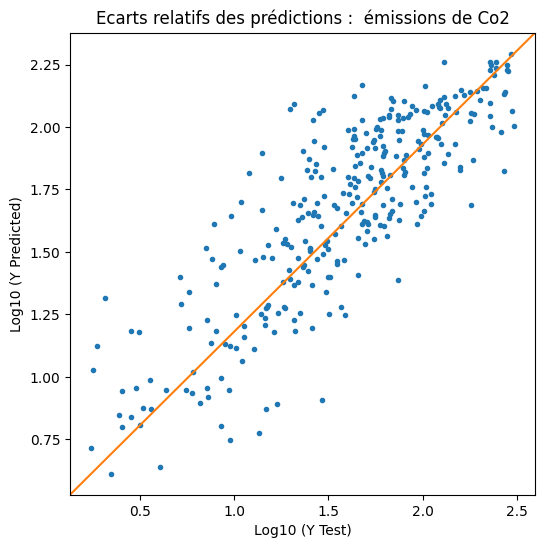

In [120]:
fig, ax = plt.subplots(figsize=(6,6))

plt.plot(np.log10(y_test_le + 1), np.log10(y_test_pred + 1), '.')
ax.plot([0,1], [0,1], transform=ax.transAxes)

plt.xlabel('Log10 (Y Test)')
plt.ylabel('Log10 (Y Predicted)')
plt.title('Ecarts relatifs des prédictions :  émissions de Co2')
plt.show()

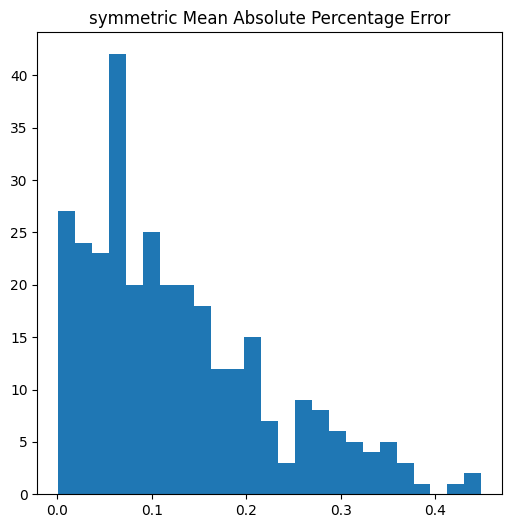

In [156]:
plt.figure(figsize=(6,6))

plt.hist(np.abs(y_test_le - y_test_pred)  / (y_test_le.values + y_test_pred)  /2, bins=25)
#plt.xlabel('Y Test')
#plt.ylabel('Y Predicted')
plt.title('symmetric Mean Absolute Percentage Error')
plt.show()

# Analyse des features importances

## Explications globales 

In [90]:
# get importance
importances = clf.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [91]:
df_features = pd.DataFrame()
df_features['importances'] = importances
df_features['features'] = cols_le
df_features['std_importances'] = std_importances
df_features = df_features.sort_values('importances', ascending=False)

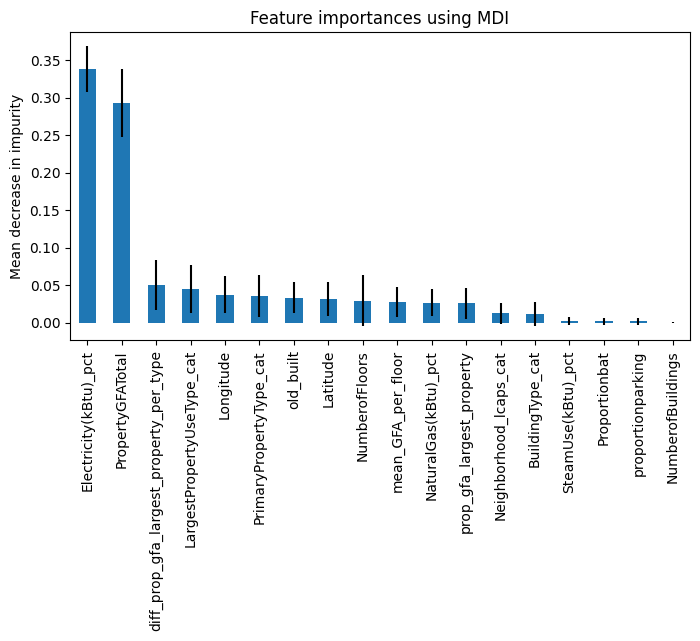

In [92]:
forest_importances = pd.Series(df_features['importances'].values, 
                               index=df_features['features'].values)


forest_importances.plot(yerr=df_features['std_importances'].values, kind='bar', figsize=(8,4))
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.show()

In [93]:
df_features

,importances,features,std_importances
10,0.337941,Electricity(kBtu)_pct,0.030717
3,0.292715,PropertyGFATotal,0.045739
8,0.049731,diff_prop_gfa_largest_property_per_type,0.033591
17,0.044837,LargestPropertyUseType_cat,0.031857
12,0.037356,Longitude,0.024587
15,0.035469,PrimaryPropertyType_cat,0.027617
2,0.033136,old_built,0.020691
13,0.031602,Latitude,0.023098
5,0.029256,NumberofFloors,0.033612
6,0.027329,mean_GFA_per_floor,0.020539


## SHAP feature importance

In [94]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [95]:
import shap

In [96]:
shap.initjs()

In [97]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_std_le_df)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


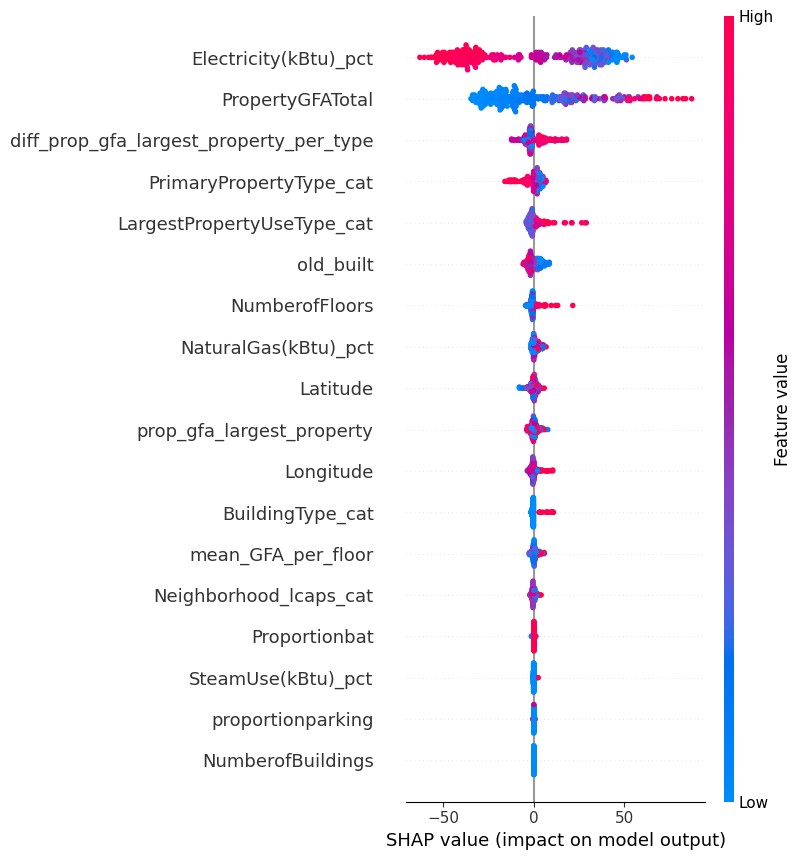

In [98]:
shap.summary_plot(shap_values, X_test_std_le_df)

# Analyse de l’influence de l’EnergyStarScore

In [99]:
df_ml_E = df[cols_le + ['ENERGYSTARScore'] + [target]].dropna()

In [100]:
df_ml_E.shape

(794, 20)

In [101]:
X_le_energy = df_ml_E[cols_le + ['ENERGYSTARScore']]
y_le_energy = df_ml_E[target]

In [102]:
# la taille de dataset est diminué
X_le_energy.shape

(794, 19)

In [103]:
X_le_std_energy = scaler.fit_transform(X_le_energy)

In [104]:
X_train_std_le_E, X_test_std_le_E, y_train_E, y_test_E = train_test_split(X_le_std_energy, y_le_energy, test_size=0.25, random_state=42)

In [105]:
print(f"Nous avons X_train avec EnergyStarScore de forme {X_train_std_le_E.shape} et y_train de forme {y_train_E.shape} ")
print(f"Nous avons X_test avec EnergyStarScore de forme {X_test_std_le_E.shape} et y_test de forme {y_test_E.shape} ")

Nous avons X_train avec EnergyStarScore de forme (595, 19) et y_train de forme (595,) 
Nous avons X_test avec EnergyStarScore de forme (199, 19) et y_test de forme (199,) 


In [106]:
X_test_std_le_E_df = pd.DataFrame(X_test_std_le_E, columns = X_le_energy.columns)

## Energy : Entraînement du random forest regressor (best model) avec les paramètres optimisés

In [107]:
clf = RandomForestRegressor(n_estimators=100, criterion="squared_error", max_features=None, min_samples_leaf=5, 
                            max_depth=20, random_state=42, n_jobs=-1)

In [108]:
clf.fit(X_train_std_le_E, y_train_E)

RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=5,
                      n_jobs=-1, random_state=42)

In [109]:
score(clf, X_train_std_le_E, y_train_E, X_test_std_le_E, y_test_E)

score train : 0.8612682893263809 and score test : 0.5743428656179834 


In [110]:
y_test_E_pred = clf.predict(X_test_std_le_E)

In [111]:
y_test_E_pred[0:5]

array([  5.4894456 ,  23.09981982, 120.24502431,  73.35243961,
       134.69191901])

In [112]:
print("Mean absolute error (Random forest regressor): {:.2f}".format(metrics.mean_absolute_error(y_test_E, y_test_E_pred)))

print("Root mean squared error (Random forest regressor): {:.2f}".format(metrics.mean_squared_error(y_test_E, y_test_E_pred, squared=False)))                                                                     

print("r2_score (Random forest regressor): {:.2f}".format(metrics.r2_score(y_test_E, y_test_E_pred)))


Mean absolute error (Random forest regressor): 26.87
Root mean squared error (Random forest regressor): 45.41
r2_score (Random forest regressor): 0.57


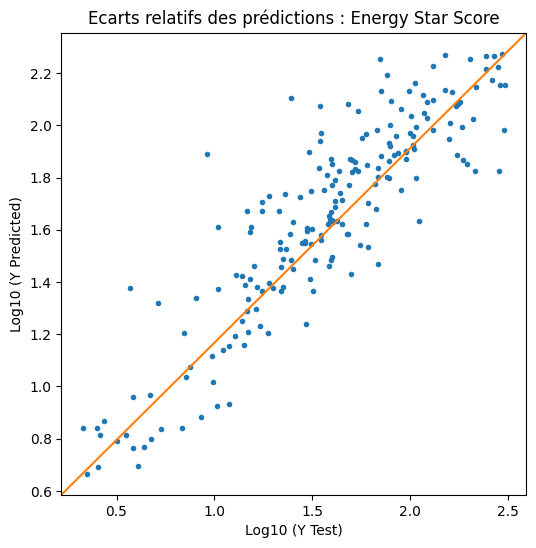

In [121]:
fig, ax = plt.subplots(figsize=(6,6))

plt.plot(np.log10(y_test_E + 1), np.log10(y_test_E_pred + 1), '.')
ax.plot([0,1], [0,1], transform=ax.transAxes)

plt.xlabel('Log10 (Y Test)')
plt.ylabel('Log10 (Y Predicted)')
plt.title('Ecarts relatifs des prédictions : Energy Star Score')
plt.show()

## Energy en plus : Analyse de l'importance des features

In [114]:
# get importance
importances = clf.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [115]:
df_features = pd.DataFrame()
df_features['importances'] = importances
df_features['features'] = X_test_std_le_E_df.columns
df_features['std_importances'] = std_importances
df_features = df_features.sort_values('importances', ascending=False)

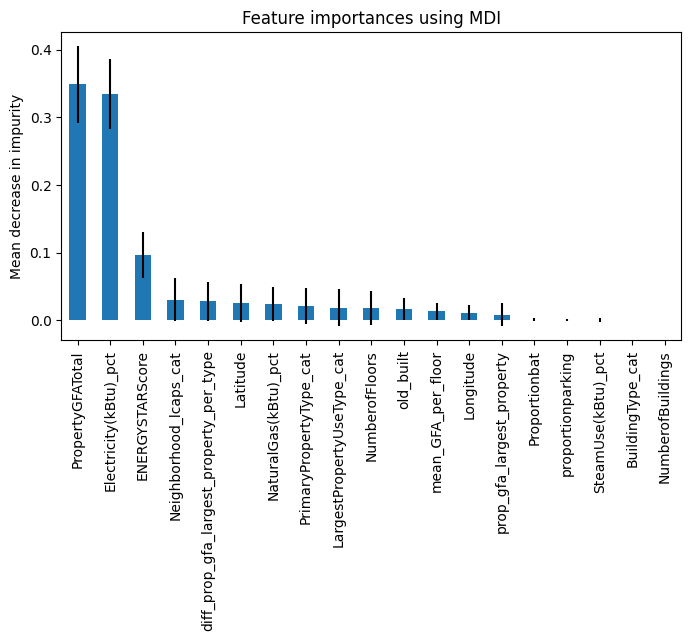

In [116]:
forest_importances = pd.Series(df_features['importances'].values, 
                               index=df_features['features'].values)


forest_importances.plot(yerr=df_features['std_importances'].values, kind='bar', figsize=(8,4))
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.show()

In [117]:
df_features

,importances,features,std_importances
3,0.348814,PropertyGFATotal,0.056423
10,0.334427,Electricity(kBtu)_pct,0.051861
18,0.096770,ENERGYSTARScore,0.033644
16,0.030883,Neighborhood_lcaps_cat,0.031723
8,0.028408,diff_prop_gfa_largest_property_per_type,0.028995
13,0.025656,Latitude,0.027857
11,0.024314,NaturalGas(kBtu)_pct,0.024936
15,0.021293,PrimaryPropertyType_cat,0.026893
17,0.018887,LargestPropertyUseType_cat,0.027014
5,0.018366,NumberofFloors,0.024554


### Energy : SHAP feature importance

In [118]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_std_le_E_df)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


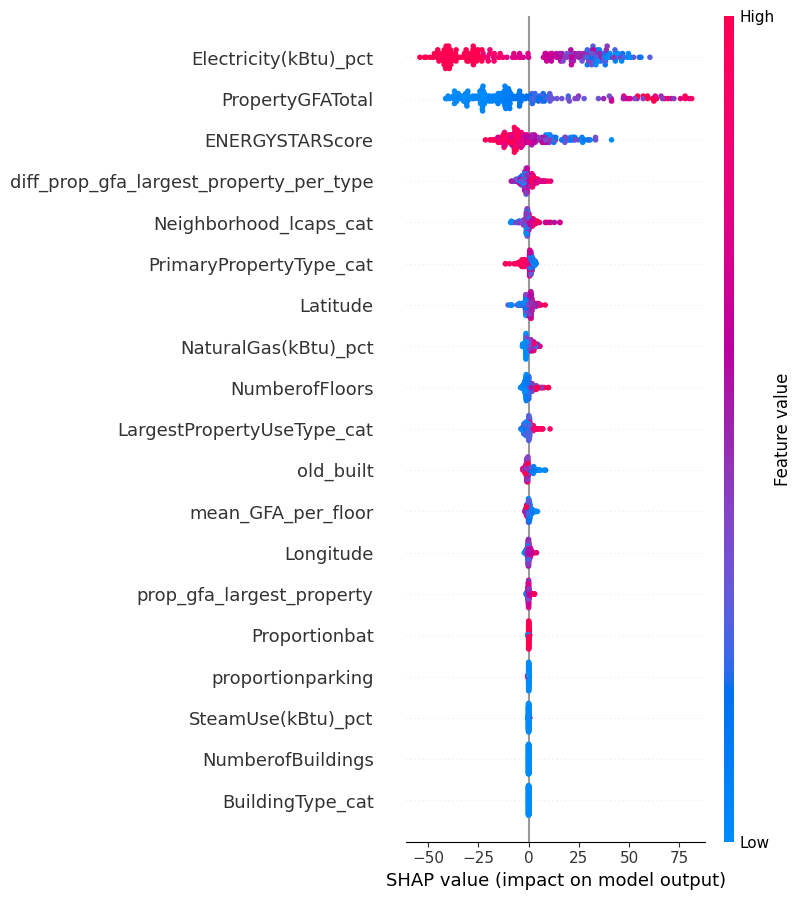

In [119]:
shap.summary_plot(shap_values, X_test_std_le_E_df)